# PLANING


## Ciclo 0.0. - Planejamento - Método IOT 


### Input - Entrada
#### O problema de negócio
1. Selecionar os mais valiosos clientes para formar o programa de fidelidade **"INSIDERS"**
2. Conjunto de dados com as vendas de produtos durante 1 ano ( Nov 2015 to Dec 2017 )
### Output - Saída
1. A indicação de pessoas para fazer parte do programa de fidelidade **"INSIDERS"**.
2. Relatório com as respostas para as seguintes perguntas:
    - Quem são as pessoas elegíveis para participar do programa de Insiders ?
    - Quantos clientes farão parte do grupo?
    - Quais as principais características desses clientes ?
    - Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
    - Qual a expectativa de faturamento desse grupo para os próximos meses ?
    - Quais as condições para uma pessoa ser elegível ao Insiders ?
    - Quais as condições para uma pessoa ser removida do Insiders ?
    - Qual a garantia que o programa Insiders é melhor que o restante da base ?
    - Quais ações o time de marketing pode realizar para aumentar o faturamento?
### Tasks - Processo
1. **Quem são as pessoas elegíveis para participar do programa de Insiders ?**
    - O que é ser elegível ? O que é um cliente "valioso" para a empresa ?
        - Faturamento:
            - Alto Ticket Médio
            - Alto LTV
            - Baixa Recência ou Alta Frequência ( tempo entre as compras )
            - Alto Basket Size ( quantidade média de produtos comprados )
            - Baixa probabilidade de Churn
            - Previsão alta de LTV
            - Alta propensão de compra

        - Custo:
            - Baixo número de devoluções

        - Experiência:  
            - Média alta de avaliações
            
            
2. **Quantos clientes farão parte do grupo?**
    - Número de clientes
    - % em relação ao total de clients
    
    
3. **Quais as principais características desses clientes ?**
    - Escrever os principais atributos dos clientes
        - Idade
        - País
        - Salário
        
    - Escrever os principais comportamentos de compra dos clients ( métricas de negócio )
        - Vide acima
    
    
4. **Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?**
    - Calcular o faturamento total da empresa durante o ano.
    - Calcular o faturamento (%) apenas do cluster Insiders.
    
    
5. **Qual a expectativa de faturamento desse grupo para os próximos meses ?**
    - Cálculo do LTV do grupo Insiders
    - Séries Temporais ( ARMA, ARIMA, HoltWinter, etc )
    

6. **Quais as condições para uma pessoa ser elegível ao Insiders ?**
    - Qual o período de avaliação ?
    - O "desempenho" do cliente está próximo da média do cluster Insiders. 
    
    
7. **Quais as condições para uma pessoa ser removida do Insiders ?**
    - O "desempenho" do cliente não está mais próximo da média do cluster Insiders. 
    
    
8. **Qual a garantia que o programa Insiders é melhor que o restante da base ?**
    - Teste de Hipóteses
    - Teste A/B
    
    
9. **Quais ações o time de marketing pode realizar para aumentar o faturamento?**
    - Descontos
    - Preferências de escolha
    - Produtos exclusivos

## Ciclo 1.0. - Métricas de Validação de Clusters 


1. Feature Engineering
    - Recência
    - Frequência
    - Monetização
    
    
2. Métricas de validação de Clustering
    - WSS ( Within-Cluster Sum of Square )  
    - SS ( Silhouette Score )
    
    
3. Cluster Analysis
    - Plot 3D
    - Cluster Profile

## Ciclo 2.0. - Análise de Silhouette 


1. Feature Engineering
    - Average Ticket
    
    
2. Análise de Silhouette
    - Silhouette Analysis  
    
    
3. Cluster Visualization
    - UMAP
    
    
4. Cluster Análise de Perfil
    - Descrição dos centróides dos cluster

## Ciclo 3.0. - Statistical Descriptive 


1. Análise Descritiva
    - Atributos numéricos
    - Atributos categóricos
    
    
2. Feature Engineering
    - Average Recency
    - Number of Returns
    
    
2. Data preparation
    - Standard Scaler

## Ciclo 04 - Feature Engineering 

1. Análise Descritiva
    - Fix NA
    
    
2. Feature Engineering
    - Average Recency Days
    - Frequency medio = Number of Purchase / Timespan
    - Ticket medio of returns
    - Gross revenue by Country
    - Country encodded by lat, long
    - Drop:
        - Number of Purchase
    
    
3. Métricas de validação de Clustering
    - DB Index
    - Dunn Index
    - GS ( Gap Statistic) 
    - DB Index ( Davies Bouldin Index )
    - CH Index
    - Gap Statistic
    
    
4. Análise de Silhouette
    - Silhouette Analysis  
    
    
5. Cluster Visualization
    - UMAP

## Ciclo 05 - EDA - Space Study

1. Univariate Analysis
    - Remove Outliers
    - LUX framework for EDA
    
    
2. Bivariate Analysis
    - Pairplot
 

3. Embedding
    - PCA
    - UMAP
    - TSNE
    - Tree-Based

# 0.0. Imports

In [139]:
import numpy      as np
import pandas     as pd
import seaborn    as sns
import sweetviz   as sv
import umap.umap_ as umap

import re



from matplotlib import pyplot as plt
from plotly     import express as px


from sklearn import cluster       as c
from sklearn import metrics       as m
from sklearn import ensemble      as en
from sklearn import preprocessing as pp
from sklearn import decomposition as dd
from sklearn.manifold import TSNE

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import warnings
# Suprimir FutureWarnings do scikit-learn
warnings.simplefilter(action='ignore', category=FutureWarning)


## 0.1. Helper Functions

In [140]:
# Defina o tema de paleta que deseja usar
sns.set_palette("pastel")  # Substitua "pastel" pelo tema de paleta desejado


## 0.2. Load dataset

In [141]:
# Carregar os dados brutos de um arquivo CSV com a codificação especificada
df_raw = pd.read_csv('../data/raw/Ecommerce.csv', encoding='ISO-8859-1')

# Remover uma coluna extra 'Unnamed: 8'
df_raw = df_raw.drop(columns=['Unnamed: 8'], axis=1)

# 1.0. Descrição dos dados

In [142]:
df1 = df_raw.copy()

## 1.1. Rename columuns

In [143]:
cols_new = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country']
df1.columns = cols_new

## 1.2. Data dimensions

In [144]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of cols: {}'.format(df1.shape[1]))

Number of rows: 541909
Number of cols: 8


## 1.3. Data types

In [145]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4. Check NA

In [146]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5. Replace NA

In [147]:
# Filtrar as linhas com 'customer_id' ausente (NaN)
df_missing = df1.loc[df1['customer_id'].isna(), :]

# Filtrar as linhas com 'customer_id' presente
df_not_missing = df1.loc[~df1['customer_id'].isna(), :]


In [228]:
# Criar um DataFrame de referência para 'customer_id'
df_backup = pd.DataFrame(df_missing['invoice_no'].drop_duplicates())

# Atribuir IDs únicos começando em 19000 para cada fatura ausente
df_backup['customer_id'] = np.arange(19000, 19000 + len( df_backup ), 1)

# Mesclar o DataFrame original com o DataFrame de referência usando 'invoice_no' como chave
df1 = pd.merge( df1, df_backup, on='invoice_no', how='left' )

# Combinar os valores de 'customer_id_x' e 'customer_id_y', mantendo o primeiro valor não nulo encontrado
df1['customer_id'] = df1['customer_id_x'].combine_first( df1['customer_id_y'] )

# Remover as colunas 'customer_id_x' e 'customer_id_y'
df1 = df1.drop( columns=['customer_id_x', 'customer_id_y'], axis=1)


In [149]:
df1.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

## 1.6. Change dtypes

In [229]:
# Converter a coluna 'invoice_date' para um formato de data com um formato de data específico
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

# Converter a coluna 'customer_id' para números inteiros
df1['customer_id'] = df1['customer_id'].astype(int)
df1.head()


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850


In [151]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

## 1.7. Descriptive Statistics

In [230]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

### 1.7.1. Numerical Attributs


In [231]:
# Central tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - desvio padrão, mínimo, máximo, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(np.max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'mediana', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,mediana,std,skew,kurtosis
0,quantity,-80995.00,80995.0,161990.00,9.552250,3.00,218.080957,-0.264076,119769.160031
1,unit_price,-11062.06,38970.0,50032.06,4.611114,2.08,96.759764,186.506972,59005.719097
2,customer_id,12346.00,22709.0,10363.00,16688.840453,16249.00,2911.408666,0.487449,-0.804287


#### <font color='red'> 1.7.1.1. Numerical Attributs - Investigating </font>


1. Quantity negativa ( pode ser devolução )


2. Preço unitário igual a zero ( pode ser promoção? )

### 1.7.2. Categorical Attributs

#### Invoice No


In [154]:
# Problema: Temos invoice com letras e números
# df1['invoice_no'].astype(int)

# Identificação:
df_letter_invoices = df1.loc[df1['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+', x))), :]
df_letter_invoices.head()

print('Total number of invoices: {}'.format(len(df_letter_invoices)))
print('Total number of negative quantity: {}'.format(len(df_letter_invoices[df_letter_invoices['quantity'] < 0])))


Total number of invoices: 9291
Total number of negative quantity: 9288


#### Stock Code

In [155]:
# Verifique apenas os caracteres em stock code
df1.loc[df1['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z]+$', x))), 'stock_code'].unique()

# Ação:
## 1. Remove stock_code in ['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK']

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

#### Description

In [156]:
df1.head()

# Acão: 
# 1. Deletar description

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850


#### Country

In [157]:
df1['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [158]:
# Apresenta a contagem de ocorrências de cada país no DataFrame 'df1', normalizada.
df1['country'].value_counts(normalize=True).head()


country
United Kingdom    0.914320
Germany           0.017521
France            0.015790
EIRE              0.015124
Spain             0.004674
Name: proportion, dtype: float64

In [159]:
# Conta o número de clientes únicos por país, mostrando os países com mais clientes.
df1[['customer_id', 'country']].drop_duplicates().groupby('country').count().reset_index().sort_values('customer_id', ascending=False).head()


,country,customer_id
36,United Kingdom,7587
14,Germany,95
13,France,90
10,EIRE,44
31,Spain,31


# 2.0. Filtragem de Varivéis 

In [232]:
df2 = df1.copy()

In [223]:
df2.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

In [233]:
# Filtrando dados numéricos
df2 = df2.loc[df2['unit_price'] >= 0.04, :]

# Filtrando dados categóricos
df2 = df2[~df2['stock_code'].isin(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY', 'DCGSSGIRL', 'PADS', 'B', 'CRUK'])]

# Removendo a coluna 'description'
df2 = df2.drop(columns='description', axis=1)

# Filtrando valores do país 
df2 = df2[~df2['country'].isin(['European Community', 'Unspecified'])]

# bad users
df2 = df2[~df2['customer_id'].isin([16446])]

# Separando compras e devoluções com base na quantidade ('quantity')
df2_returns = df2.loc[df1['quantity'] < 0, :]
df2_purchases = df2.loc[df1['quantity'] >= 0, :]

# 3.0. Feature Engineering 

#### Feature Ideas:
- Moving Average - 7d, 14d, 30d
- Quantidade de Compras por mês, antes do dia 15 e depois do dia 15
- Average Financial
- Basket Size * Price - Quantidade de preços por cesta


In [234]:
df3 = df2.copy()

## 3.1. Feature Creation

In [164]:
# Criando um DataFrame de referência ('df_ref') com base em outras colunas
df_ref = df3.drop(['invoice_no', 'stock_code', 'quantity', 'invoice_date', 'unit_price', 'country'], axis=1).drop_duplicates(ignore_index=True)


### 3.1.1. Gross Revenue

In [165]:
# Calculando a receita bruta ('gross_revenue') multiplicando quantidade ('quantity') pelo preço unitário ('unit_price')
df2_purchases.loc[:, 'gross_revenue'] = df2_purchases.loc[:, 'quantity'] * df2_purchases.loc[:, 'unit_price']


# Calculando o valor monetário total por cliente ('df_monetary')
df_monetary = df2_purchases.loc[:, ['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')
df_ref.isna().sum()

/var/folders/x1/pk89dqcx2jgg4h8p2wtym9780000gn/T/ipykernel_9572/3977924132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_purchases.loc[:, 'gross_revenue'] = df2_purchases.loc[:, 'quantity'] * df2_purchases.loc[:, 'unit_price']


customer_id       0
gross_revenue    91
dtype: int64

### 3.1.2. Recency - Day from last purchase


In [166]:
# Calculando a recência ('recency') com base na última data de compra
df_recency = df2_purchases.loc[:, ['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
dtype: int64

### 3.1.3. Quantity of purchased 


In [167]:
# Cálculo da quantidade de faturas únicas
df_freq = (df2_purchases.loc[:, ['customer_id', 'invoice_no']].drop_duplicates()
                                                             .groupby( 'customer_id' )
                                                             .count()
                                                             .reset_index()
                                                             .rename( columns={'invoice_no': 'qtde_invoices'}) )
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
dtype: int64

### 3.1.4. Quantity total of items purchased 


In [168]:
# Soma da quantidade de itens comprados
df_freq = (df2_purchases.loc[:, ['customer_id', 'quantity']].groupby( 'customer_id' ).sum()
                                                           .reset_index()
                                                           .rename( columns={'quantity': 'qtde_items'} ) )
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
dtype: int64

### 3.1.5. Quantity of products purchased

In [169]:
# Numero de produtos
df_freq = (df2_purchases.loc[:, ['customer_id', 'stock_code']].groupby('customer_id').count()
                                                           .reset_index()
                                                           .rename( columns={'stock_code': 'qtde_products'} ) )
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
qtde_products    91
dtype: int64

### 3.1.6. Average Ticket Value 


In [170]:
# Ticket médio
df_avg_ticket = df2_purchases.loc[:, ['customer_id', 'gross_revenue']].groupby( 'customer_id' ).mean().reset_index().rename( columns={'gross_revenue':'avg_ticket'} )
df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
qtde_products    91
avg_ticket       91
dtype: int64

### 3.1.7. Average Recency Days 


In [171]:
# Média dos dias de recência

df_aux = df2[['customer_id', 'invoice_date']].drop_duplicates().sort_values( ['customer_id', 'invoice_date'], ascending=[False, False] )
df_aux['next_customer_id'] = df_aux['customer_id'].shift() # next customer
df_aux['previous_date'] = df_aux['invoice_date'].shift() # next invoince date

df_aux['avg_recency_days'] = df_aux.apply( lambda x: ( x['invoice_date'] - x['previous_date'] ).days if x['customer_id'] == x['next_customer_id'] else np.nan, axis=1 )

df_aux = df_aux.drop( ['invoice_date', 'next_customer_id', 'previous_date'], axis=1 ).dropna()

# average recency 
df_avg_recency_days = df_aux.groupby( 'customer_id' ).mean().reset_index()

# merge
df_ref = pd.merge( df_ref, df_avg_recency_days, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
dtype: int64

### 3.1.8. Frequency Purchase 


In [172]:
# Frequência
df_aux = ( df2_purchases[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates()
                                                             .groupby( 'customer_id')
                                                             .agg( max_ = ( 'invoice_date', 'max' ), 
                                                                   min_ = ( 'invoice_date', 'min' ),
                                                                   days_= ( 'invoice_date', lambda x: ( ( x.max() - x.min() ).days ) + 1 ),
                                                                   buy_ = ( 'invoice_no', 'count' ) ) ).reset_index()
# Frequency
df_aux['frequency'] = df_aux[['buy_', 'days_']].apply( lambda x: x['buy_'] / x['days_'] if  x['days_'] != 0 else 0, axis=1 )

# Merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'frequency']], on='customer_id', how='left' )

df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
frequency             91
dtype: int64

### 3.1.9. Number of Returns 


In [173]:
# Número de Devoluções
df_returns = df2_returns[['customer_id', 'quantity']].groupby( 'customer_id' ).sum().reset_index().rename( columns={'quantity':'qtde_returns'} )
df_returns['qtde_returns'] = df_returns['qtde_returns'] * -1

df_ref = pd.merge( df_ref, df_returns, how='left', on='customer_id' )
df_ref.loc[df_ref['qtde_returns'].isna(), 'qtde_returns'] = 0

df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
frequency             91
qtde_returns           0
dtype: int64

### 3.1.10. Basket Size - Quantidade de Items por Cesta ( Quantity )

- Invoice No = Compra = purchase
- Stock Code = Produto = Product
- Quantity = Item = Item

In [174]:
# Tamanho médio do cesto
df_aux = ( df2_purchases.loc[:, ['customer_id', 'invoice_no', 'quantity']].groupby( 'customer_id' )
                                                                            .agg( n_purchase=( 'invoice_no', 'nunique'),
                                                                                  n_products=( 'quantity', 'sum' ) )
                                                                            .reset_index() )

# calculation
df_aux['avg_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_basket_size']], how='left', on='customer_id' )
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
frequency             91
qtde_returns           0
avg_basket_size       91
dtype: int64

### 3.1.11. Unique Basket Size - Quantidade de produtos distintos por compra 

In [175]:
# Tamanho médio do cesto único
df_aux = ( df2_purchases.loc[:, ['customer_id', 'invoice_no', 'stock_code']].groupby( 'customer_id' )
                                                                            .agg( n_purchase=( 'invoice_no', 'nunique'),
                                                                                   n_products=( 'stock_code', 'nunique' ) )
                                                                            .reset_index() )

# calculation
df_aux['avg_unique_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_unique_basket_size']], how='left', on='customer_id' )
df_ref.isna().sum()

customer_id                  0
gross_revenue               91
recency_days                91
qtde_invoices               91
qtde_items                  91
qtde_products               91
avg_ticket                  91
avg_recency_days          2816
frequency                   91
qtde_returns                 0
avg_basket_size             91
avg_unique_basket_size      91
dtype: int64

In [176]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,297.0,18.152222,-35.500000,17.000000,40.0,50.970588,0.617647
1,13047,3232.59,56.0,9.0,1390.0,171.0,18.904035,-27.250000,0.028302,35.0,154.444444,11.666667
2,12583,6705.38,2.0,15.0,5028.0,232.0,28.902500,-23.187500,0.040323,50.0,335.200000,7.600000
3,13748,948.25,95.0,5.0,439.0,28.0,33.866071,-92.666667,0.017921,0.0,87.800000,4.800000
4,15100,876.00,333.0,3.0,80.0,3.0,292.000000,-8.600000,0.073171,22.0,26.666667,0.333333


# 4.0. EDA (Exploratory Data Analysis)

In [235]:
df4 = df_ref.dropna()
df4.isna().sum()

customer_id               0
gross_revenue             0
recency_days              0
qtde_invoices             0
qtde_items                0
qtde_products             0
avg_ticket                0
avg_recency_days          0
frequency                 0
qtde_returns              0
avg_basket_size           0
avg_unique_basket_size    0
dtype: int64

## 4.1. Univariate Analysis


**Metricas para olhar**
1. Clusters Coesos - Separados
2. Métricas
    - Min, Máximo, Range ( Dispersão )
    - Média e Mediana
    - Desvio Padrão e Variância.
    - Coeficiente de Variação ( CV )
    - Distribuição

**Investigar/Remover**

1. Gross Revenue - ok

In [236]:
# Crie o relatório de perfil
report = sv.analyze(df4)

# Mostre o relatório
report.show_html('output_v3.html')


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report output_v3.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 4.1.1. Gross Revenue


In [179]:
df4.sort_values('gross_revenue', ascending=False).head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
1017,14646,279138.02,1.0,72.0,196844.0,2060.0,135.503893,-7.844444,0.203390,288.0,2733.944444,9.708333
492,18102,259657.30,0.0,60.0,64124.0,431.0,602.453132,-14.680000,0.163043,0.0,1068.733333,2.500000
433,17450,194550.79,8.0,46.0,69993.0,337.0,577.302047,-12.821429,0.127778,952.0,1521.586957,2.695652
3338,16446,168472.50,0.0,2.0,80997.0,3.0,56157.500000,-205.000000,0.009709,80995.0,40498.500000,1.500000
66,14911,140450.72,1.0,199.0,80263.0,5673.0,24.757751,-2.601399,0.533512,3332.0,403.331658,8.974874


In [180]:
df3[df3['customer_id'] == 14646].head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
37952,539491,21981,12,2016-12-18,0.29,Netherlands,14646
37953,539491,21986,12,2016-12-18,0.29,Netherlands,14646
37954,539491,22720,2,2016-12-18,4.95,Netherlands,14646
37955,539491,21931,1,2016-12-18,1.95,Netherlands,14646
37956,539491,22613,2,2016-12-18,0.85,Netherlands,14646


### 4.1.2. Qtde Items


In [181]:
df4[df4['qtde_items'] == 196844]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
1017,14646,279138.02,1.0,72.0,196844.0,2060.0,135.503893,-7.844444,0.20339,288.0,2733.944444,9.708333


### 4.1.3. Qtde Products

In [182]:
df4[df4['qtde_products'] == 7838]
#df3[df3['customer_id'] == 17841].head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
68,17841,40967.72,1.0,124.0,23053.0,7838.0,5.226808,-3.321429,0.33244,203.0,185.91129,10.66129


### 4.1.4. Avg Ticket


In [227]:
#df4[df4['avg_ticket'] == 56157.5]
df3[df3['customer_id'] == 16446]

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id


### 4.1.5. Frequency


In [184]:
#df4[df4['frequency'] == 17]
df3[df3['customer_id'] == 17850]

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850
...,...,...,...,...,...,...,...
86898,C543611,82483,-1,2017-02-08,4.95,United Kingdom,17850
86899,C543611,21874,-1,2017-02-08,1.06,United Kingdom,17850
86900,C543611,71477,-2,2017-02-08,2.75,United Kingdom,17850
86901,C543611,82483,-1,2017-02-08,4.95,United Kingdom,17850


### 4.1.6. Average Basket Size


In [185]:
df4[df4['avg_basket_size'] == 40498.5]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
3338,16446,168472.5,0.0,2.0,80997.0,3.0,56157.5,-205.0,0.009709,80995.0,40498.5,1.5


## 4.2. Bivariate Analysis

In [186]:
cols = ['customer_id']
df42 = df4.drop(cols, axis=1)

/Users/raqueloliveira/miniconda3/envs/clustering_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1200 with 0 Axes>

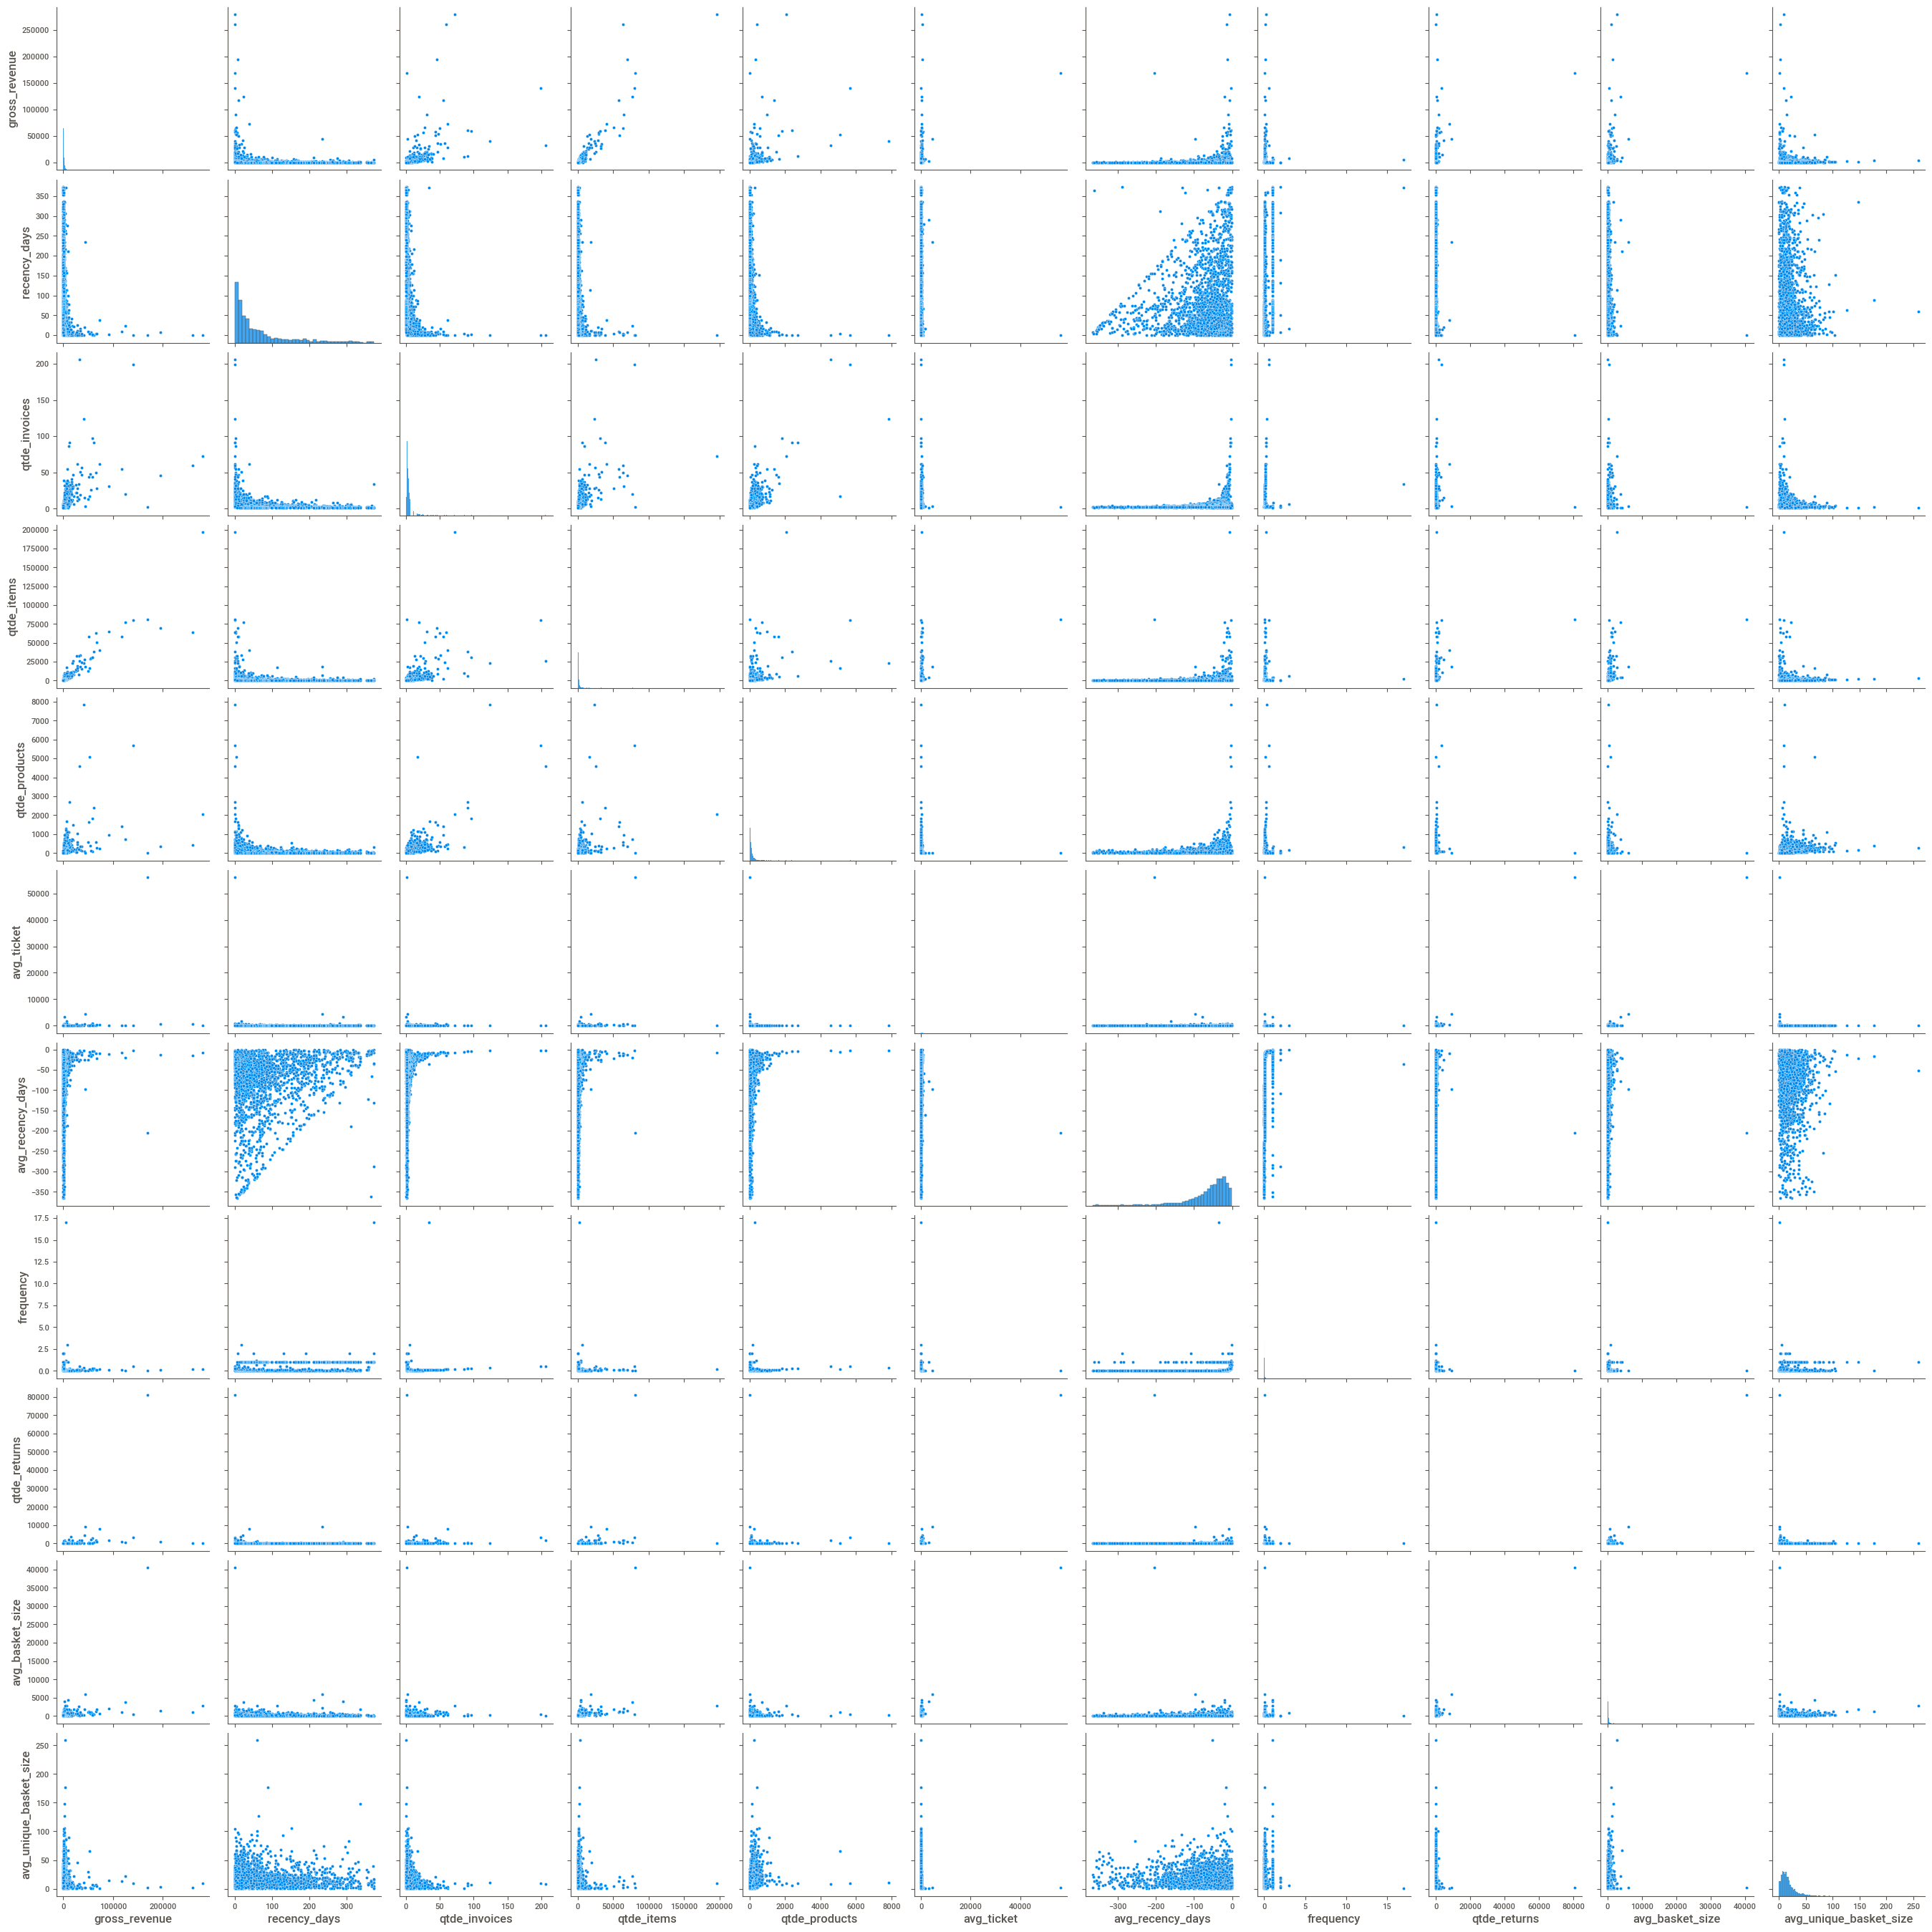

In [187]:
plt.figure(figsize=(25, 12))
sns.pairplot(df42)

**Notes**
1. Frequency has low variance
2. Avg Ticket has low variance

## 4.3. Estudo do Espaço


In [188]:
df43 = df4.drop(columns=['customer_id'], axis=1).copy()

In [189]:
mm = pp.MinMaxScaler()

# Aplicando a escala Min-Max a colunas específicas do DataFrame df43
# Isso irá dimensionar os valores de cada coluna para o intervalo entre 0 e 1

df43['gross_revenue']          = mm.fit_transform( df43[['gross_revenue']] )
df43['recency_days']           = mm.fit_transform( df43[['recency_days']] )
df43['qtde_invoices']          = mm.fit_transform( df43[['qtde_invoices']])
df43['qtde_items']             = mm.fit_transform( df43[['qtde_items']])
df43['qtde_products']          = mm.fit_transform( df43[['qtde_products']])
df43['avg_ticket']             = mm.fit_transform( df43[['avg_ticket']])
df43['avg_recency_days']       = mm.fit_transform( df43[['avg_recency_days']])
df43['frequency']              = mm.fit_transform( df43[['frequency']])
df43['qtde_returns']           = mm.fit_transform( df43[['qtde_returns']])
df43['avg_basket_size']        = mm.fit_transform( df43[['avg_basket_size']])
df43['avg_unique_basket_size'] = mm.fit_transform( df43[['avg_unique_basket_size']] )


X = df43.copy()

### 4.3.1. PCA


In [190]:
# Obtendo o número de colunas (features) do DataFrame X
X.shape[1]

11

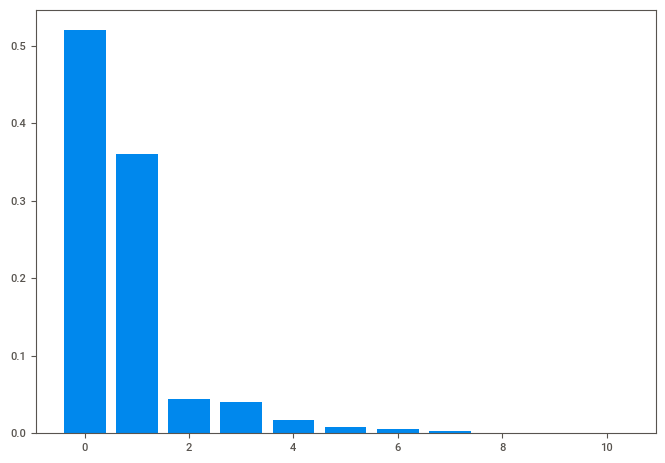

In [191]:
# Criando uma instância do PCA com o número de componentes igual ao número de colunas
pca = dd.PCA(n_components=X.shape[1])

# Aplicando a análise de componentes principais ao DataFrame X
principal_components = pca.fit_transform(X)

# Preparando um gráfico de barras para mostrar a variância explicada por cada componente principal
features = range(pca.n_components_)

# Criando um gráfico de barras das variâncias explicadas por cada componente
plt.bar(features, pca.explained_variance_ratio_)

# Criando um DataFrame df_pca para armazenar os resultados da análise de componentes principais
df_pca = pd.DataFrame(principal_components)

<Axes: xlabel='0', ylabel='1'>

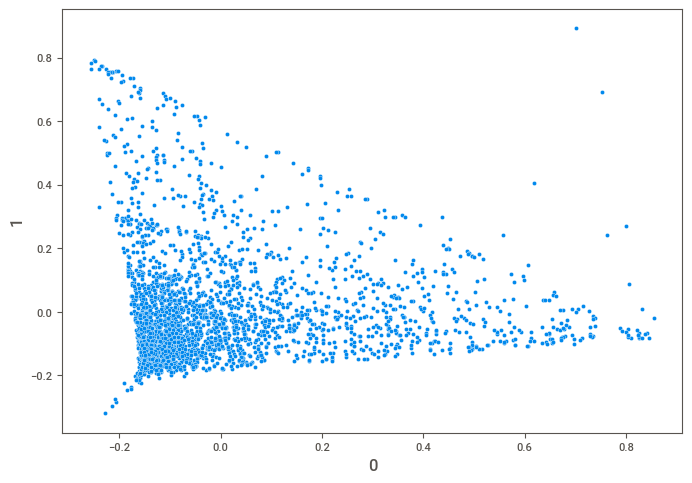

In [192]:
sns.scatterplot( x=0, y=1, data=df_pca )

### 4.3.2. UMAP


<Axes: xlabel='embedding_x', ylabel='embedding_y'>

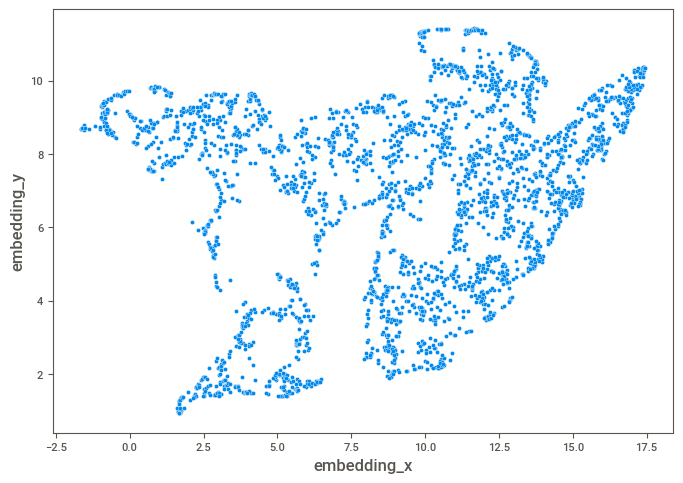

In [193]:
# Cria uma instância do reduzidor UMAP (Uniform Manifold Approximation and Projection)
reducer = umap.UMAP(random_state=42)

# Realiza a redução de dimensionalidade UMAP nos dados em X
embedding = reducer.fit_transform(X)

# Adiciona as coordenadas de embedding aos dados do DataFrame df_pca
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

# Plota os dados no espaço UMAP usando seaborn
sns.scatterplot(x='embedding_x', y='embedding_y', data=df_pca)


### 4.3.2. t-SNE


<Axes: xlabel='embedding_x', ylabel='embedding_y'>

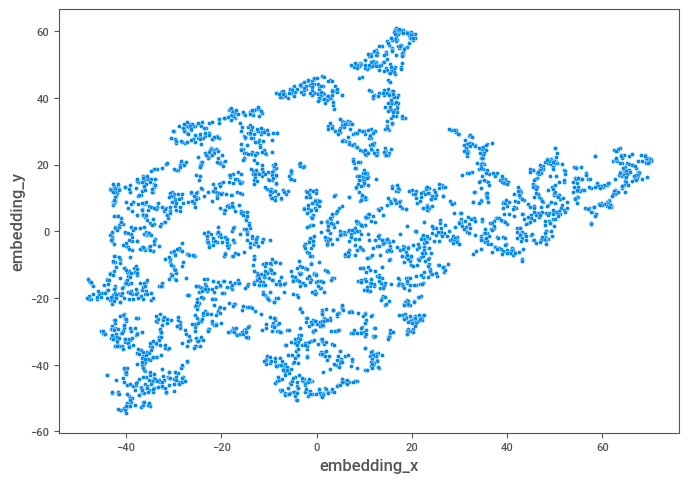

In [194]:
# Cria uma instância do reduzidor t-SNE (t-Distributed Stochastic Neighbor Embedding)
reducer = TSNE(n_components=2, n_jobs=-1, random_state=42)

# Realiza a redução de dimensionalidade t-SNE nos dados em X
embedding = reducer.fit_transform(X)

# Adiciona as coordenadas de embedding aos dados do DataFrame df_pca
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

# Plota os dados no espaço t-SNE usando seaborn
sns.scatterplot(x='embedding_x', y='embedding_y', data=df_pca)


### 4.3.3. Tree-Based Embedding

In [195]:
# Define o conjunto de treinamento, onde X é o conjunto de recursos e y é a variável de destino
X = df4.drop(columns=['customer_id', 'gross_revenue'], axis=1)
y = df4['gross_revenue']

# Define o modelo de regressão de floresta aleatória com 100 estimadores e uma semente aleatória de 42
rf_model = en.RandomForestRegressor(n_estimators=100, random_state=42)

# Treina o modelo de regressão de floresta aleatória com os dados de treinamento
rf_model.fit(X, y)

# Leaf 

# dataframe Leaf

RandomForestRegressor(random_state=42)

In [196]:
# Cria um DataFrame chamado "df_leaf" que contém as previsões de folhas do modelo de regressão de floresta aleatória para os dados de treinamento
# O método "apply" retorna o índice de folha de cada amostra no modelo
df_leaf = pd.DataFrame(rf_model.apply(X))

In [197]:
X.shape

(2969, 10)

In [198]:
df_leaf.shape

(2969, 100)

In [199]:
df_leaf.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2984,3134,3369,3325,3033,3149,3229,3132,3172,3128,...,3257,3227,3187,2798,3208,3131,3026,3367,3333,3292
1,2935,3110,3028,2954,3021,3147,2938,2808,3112,3034,...,2535,2921,2950,2758,3137,3064,2935,2925,2977,2830
2,3489,3615,3579,3405,3593,3619,3539,3546,3686,3615,...,3591,3480,3563,3554,3614,3564,3574,3615,3582,3667
3,2132,1962,1569,1601,1829,1497,2106,1787,2027,2115,...,1803,1367,2052,2081,2026,2171,1491,1001,2172,2093
4,217,270,299,595,175,467,722,698,173,165,...,421,209,683,586,690,733,594,907,697,207


<Axes: xlabel='embedding_x', ylabel='embedding_y'>

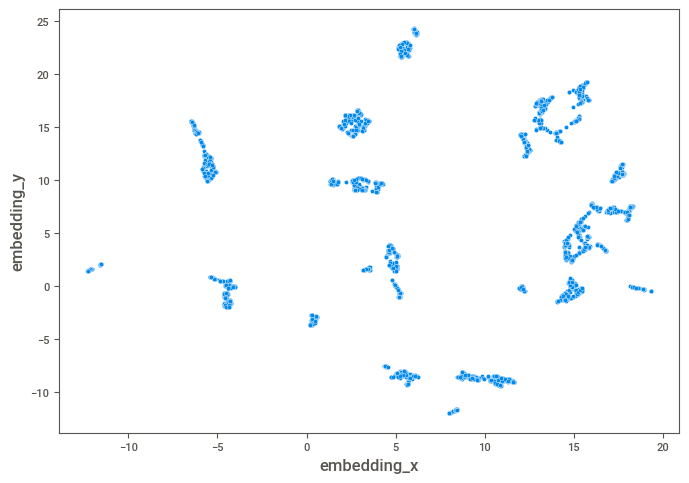

In [200]:
# Reduz a dimensionalidade usando UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_leaf)

# Cria as colunas 'embedding_x' e 'embedding_y' no DataFrame df_pca para representar a redução de dimensionalidade UMAP
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

# Plota um gráfico UMAP com as coordenadas 'embedding_x' e 'embedding_y' usando seaborn
sns.scatterplot(x='embedding_x', y='embedding_y', data=df_pca)


# 5.0. Data Preparation 

In [201]:
df5 = df4.copy()

In [202]:
df5.columns

Index(['customer_id', 'gross_revenue', 'recency_days', 'qtde_invoices',
       'qtde_items', 'qtde_products', 'avg_ticket', 'avg_recency_days',
       'frequency', 'qtde_returns', 'avg_basket_size',
       'avg_unique_basket_size'],
      dtype='object')

In [203]:
## Standard Scalaer (Padronização dos Dados)
# Criação do objeto StandardScaler
ss = pp.StandardScaler()

# Padronização das colunas 'gross_revenue', 'recency_days', 'invoice_no' e 'avg_ticket'
df5['gross_revenue']          = ss.fit_transform( df5[['gross_revenue']] )
df5['recency_days']           = ss.fit_transform( df5[['recency_days']] )
df5['qtde_invoices']          = ss.fit_transform( df5[['qtde_invoices']] )
df5['qtde_items']             = ss.fit_transform( df5[['qtde_items']] )
df5['qtde_products']          = ss.fit_transform( df5[['qtde_products']] )
df5['avg_ticket']             = ss.fit_transform( df5[['avg_ticket']] )
df5['avg_recency_days']       = ss.fit_transform( df5[['avg_recency_days']] )
df5['frequency']              = ss.fit_transform( df5[['frequency']] )
df5['qtde_returns']           = ss.fit_transform( df5[['qtde_returns']] )
df5['avg_basket_size']        = ss.fit_transform( df5[['avg_basket_size']] )
df5['avg_unique_basket_size'] = ss.fit_transform( df5[['avg_unique_basket_size']] )

In [204]:
df5.head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
0,17850,0.249733,3.958037,3.193307,0.021090,0.645823,-0.032549,0.501281,41.378877,-0.014652,-0.251248,-1.091168
1,13047,0.045683,-0.106602,0.370056,-0.037178,0.178898,-0.031824,0.631132,-0.209503,-0.017958,-0.120504,-0.376377
2,12583,0.373960,-0.801192,1.047636,0.580837,0.404949,-0.022180,0.695074,-0.180046,-0.008039,0.107890,-0.639461
3,13748,-0.170252,0.395046,-0.081664,-0.198732,-0.351024,-0.017392,-0.398496,-0.234940,-0.041103,-0.204712,-0.820600
4,15100,-0.177082,3.456388,-0.307524,-0.259718,-0.443668,0.231589,0.924675,-0.099554,-0.026555,-0.281957,-1.109561


# 6.0. Feature Selection

In [205]:
df6 = df5.copy()

# 7.0. Hyperparameter Fine-Tunning

In [206]:
# Preparar os dados para a clusterização (X é sua matriz de recursos)
X = df6.drop(columns=['customer_id'])

In [207]:
X.head()

,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
0,0.249733,3.958037,3.193307,0.021090,0.645823,-0.032549,0.501281,41.378877,-0.014652,-0.251248,-1.091168
1,0.045683,-0.106602,0.370056,-0.037178,0.178898,-0.031824,0.631132,-0.209503,-0.017958,-0.120504,-0.376377
2,0.373960,-0.801192,1.047636,0.580837,0.404949,-0.022180,0.695074,-0.180046,-0.008039,0.107890,-0.639461
3,-0.170252,0.395046,-0.081664,-0.198732,-0.351024,-0.017392,-0.398496,-0.234940,-0.041103,-0.204712,-0.820600
4,-0.177082,3.456388,-0.307524,-0.259718,-0.443668,0.231589,0.924675,-0.099554,-0.026555,-0.281957,-1.109561


In [208]:
clusters = [2, 3, 4, 5, 6, 7]

## 7.1 WSS

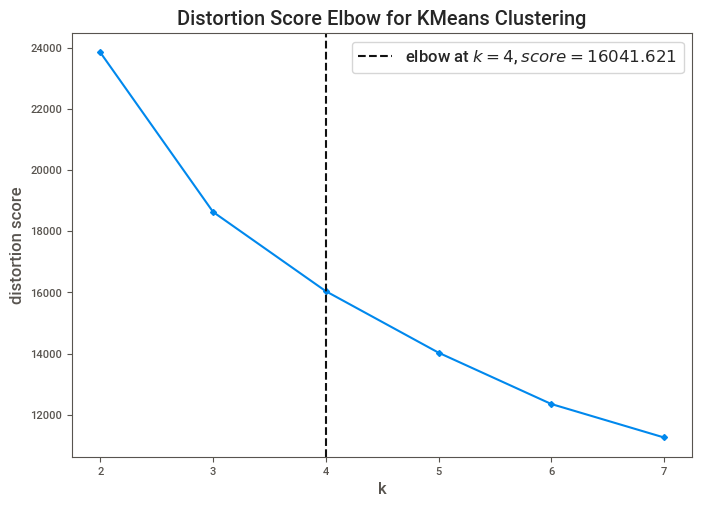

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [209]:
# Usar o KElbowVisualizer para determinar o número ideal de clusters (método do cotovelo)
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timings=False)
kmeans.fit(X)
kmeans.show()


## 7.2 Silhouette Score

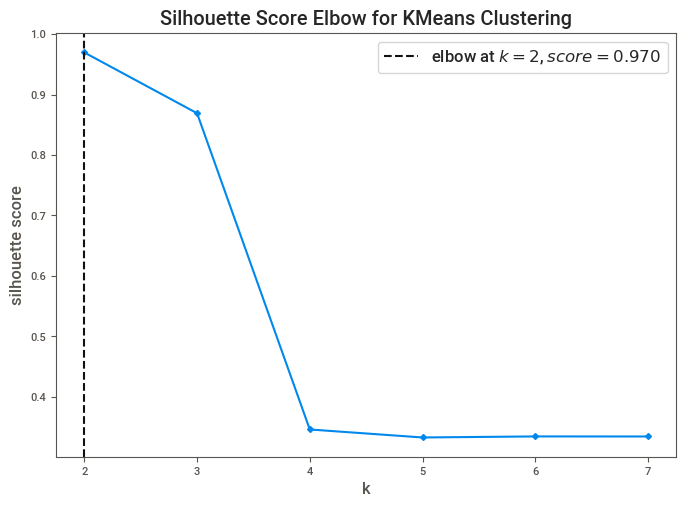

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [210]:
# Usar o KElbowVisualizer com a pontuação de silhueta como a métrica para determinar o número ideal de clusters
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, metric='silhouette', timings=False)
kmeans.fit(X)
kmeans.show()

## 7.3. Silhouette Analysis

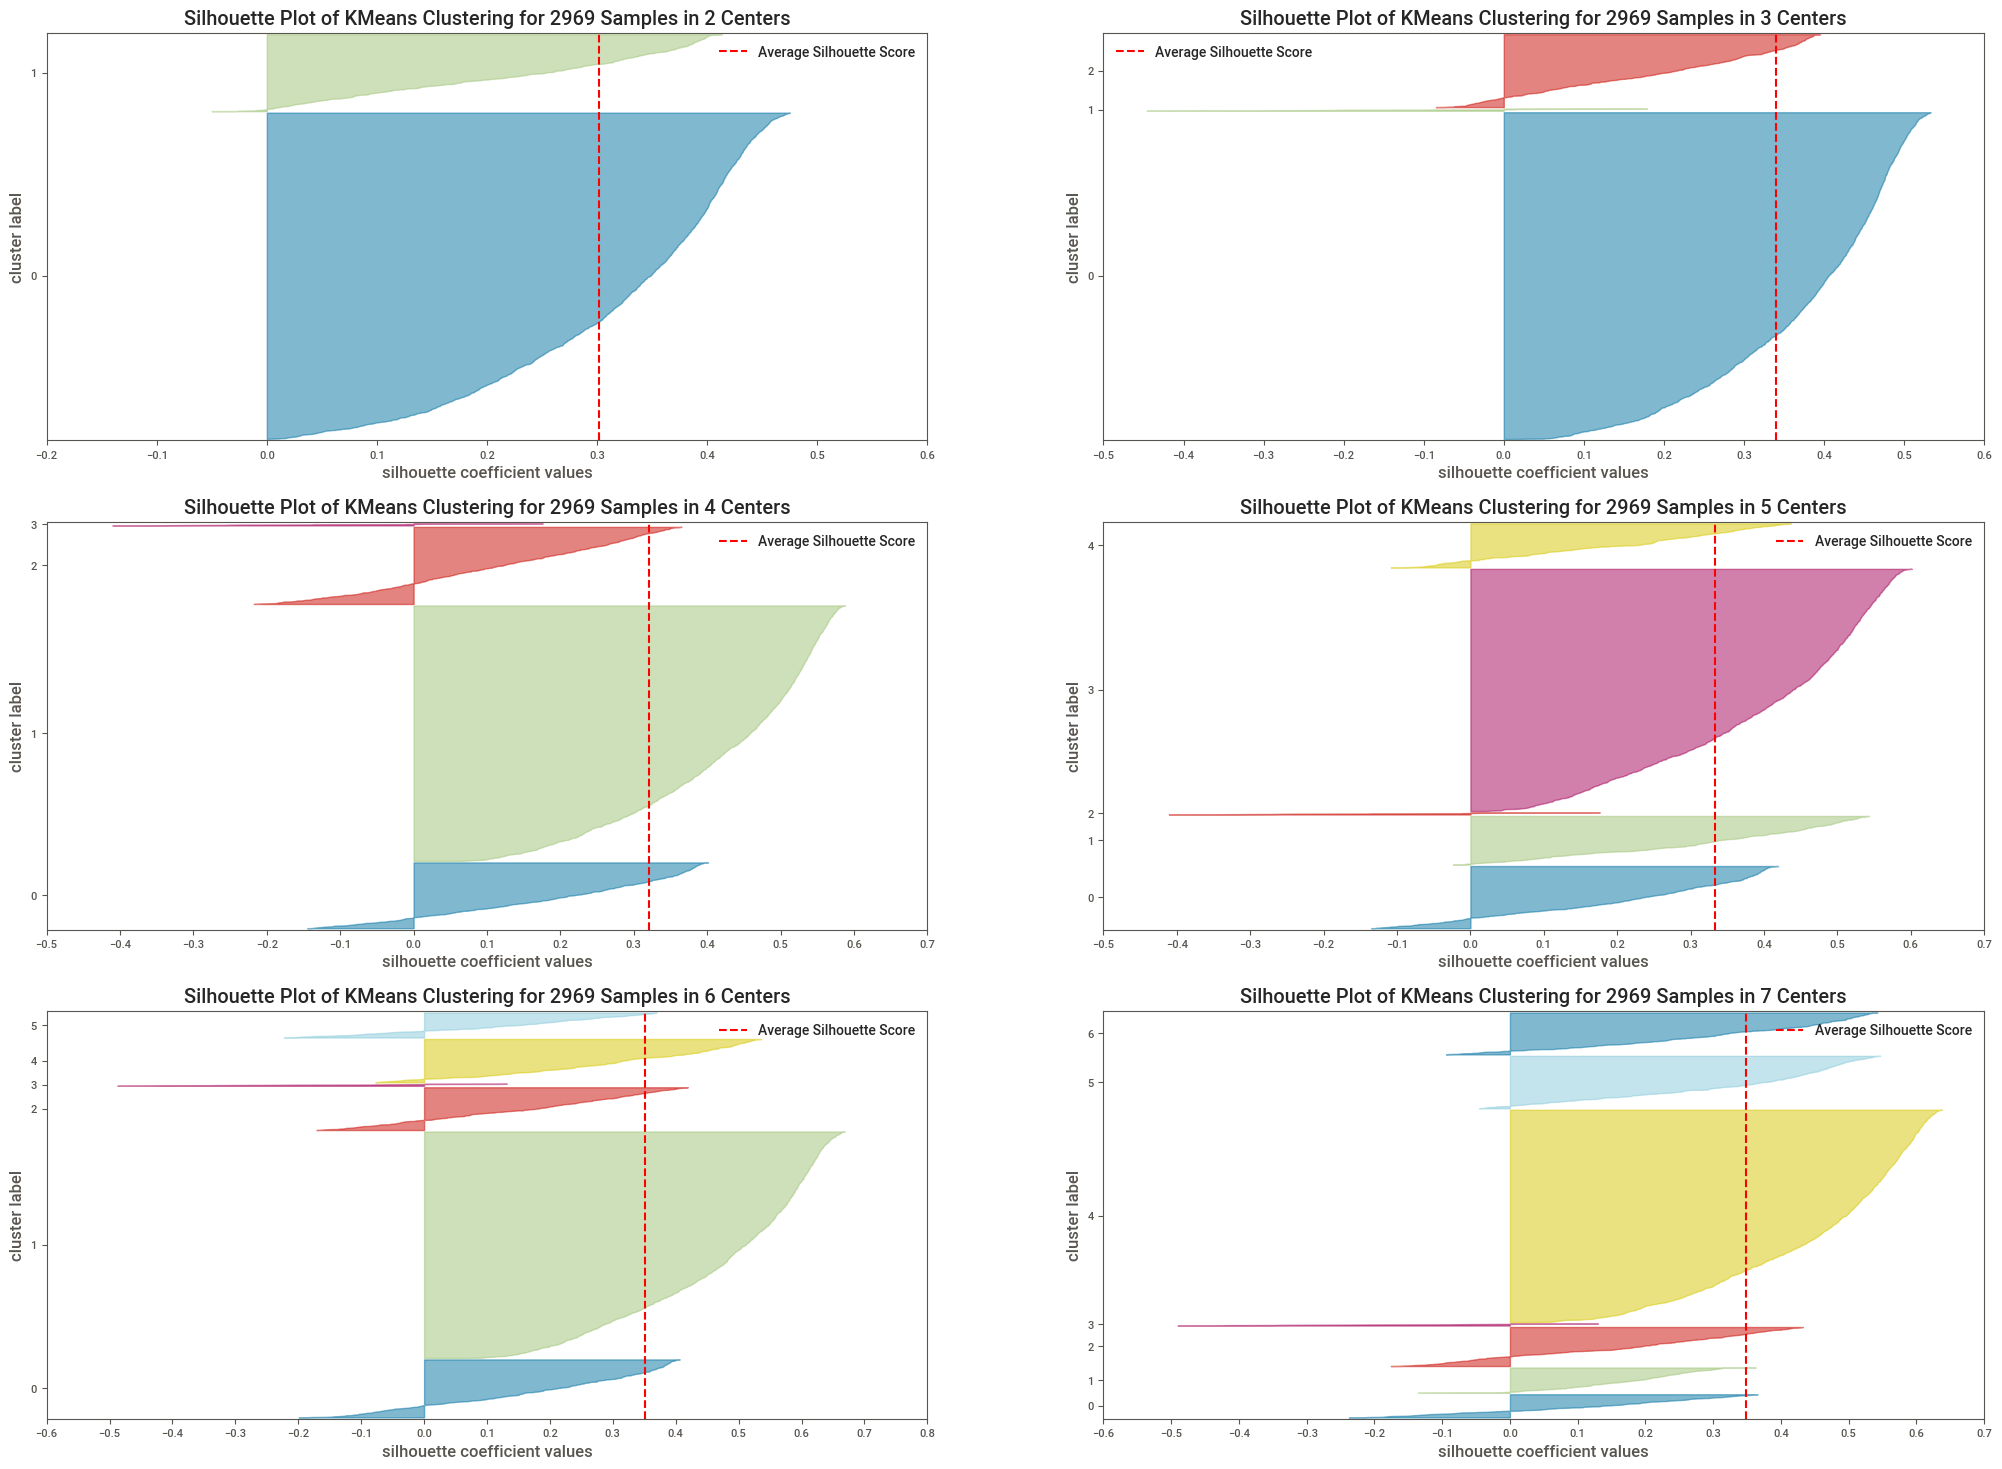

In [211]:
# Criando uma matriz de subplots com 3 linhas e 2 colunas para exibir gráficos
fig, ax = plt.subplots(3, 2, figsize=(25, 18))

# Loop através do número de clusters desejados
for k in clusters:
    # Criando um objeto KMeans com o número de clusters especificado
    km = c.KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
    
    # Calculando a posição no subplot
    q, mod = divmod(k, 2)
    
    # Inicializando o visualizador de silhueta com cores 'yellowbrick'
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    
    # Ajustando o visualizador aos dados
    visualizer.fit(X)
    
    # Finalizando o visualizador para exibição
    visualizer.finalize()


# 8.0. Model Training

## 8.1. K-Means

In [212]:
# Definição do modelo
k = 3 # número de clusters
kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300)

# Treinamento do modelo
kmeans.fit(X)  # X são os dados a serem clusterizados

# Clusterização
labels = kmeans.labels_  # labels é o array de atribuições de cluster

### 8.1.1. Cluster Validation

In [213]:
from sklearn import metrics as m

In [214]:
# Cálculo do WSS (Within-cluster sum of square)
print('WSS value: {}'.format(kmeans.inertia_))

# Cálculo do SS (Silhouette Score)
print('SS value: {}'.format(m.silhouette_score(X, labels, metric='euclidean')))

WSS value: 23926.866658966883
SS value: 0.3405905292245775


# 9.0. Cluster Analysis 

In [215]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size,cluster
0,17850,0.249733,3.958037,3.193307,0.021090,0.645823,-0.032549,0.501281,41.378877,-0.014652,-0.251248,-1.091168,2
1,13047,0.045683,-0.106602,0.370056,-0.037178,0.178898,-0.031824,0.631132,-0.209503,-0.017958,-0.120504,-0.376377,1
2,12583,0.373960,-0.801192,1.047636,0.580837,0.404949,-0.022180,0.695074,-0.180046,-0.008039,0.107890,-0.639461,1
3,13748,-0.170252,0.395046,-0.081664,-0.198732,-0.351024,-0.017392,-0.398496,-0.234940,-0.041103,-0.204712,-0.820600,1
4,15100,-0.177082,3.456388,-0.307524,-0.259718,-0.443668,0.231589,0.924675,-0.099554,-0.026555,-0.281957,-1.109561,2


## 9.1. Visualization Inspection

/Users/raqueloliveira/miniconda3/envs/clustering_env/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


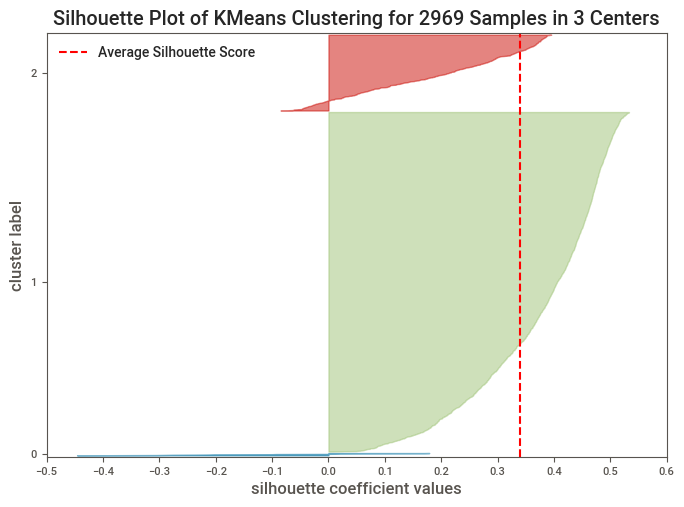

In [216]:
# Inicialização de um visualizador de silhueta com o modelo KMeans e cores 'yellowbrick'
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

# Ajustando o visualizador aos dados (X)
visualizer.fit(X)

# Finalizando o visualizador para exibir as métricas de silhueta
visualizer.finalize()


## 9.2. 2d Plot

/Users/raqueloliveira/miniconda3/envs/clustering_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


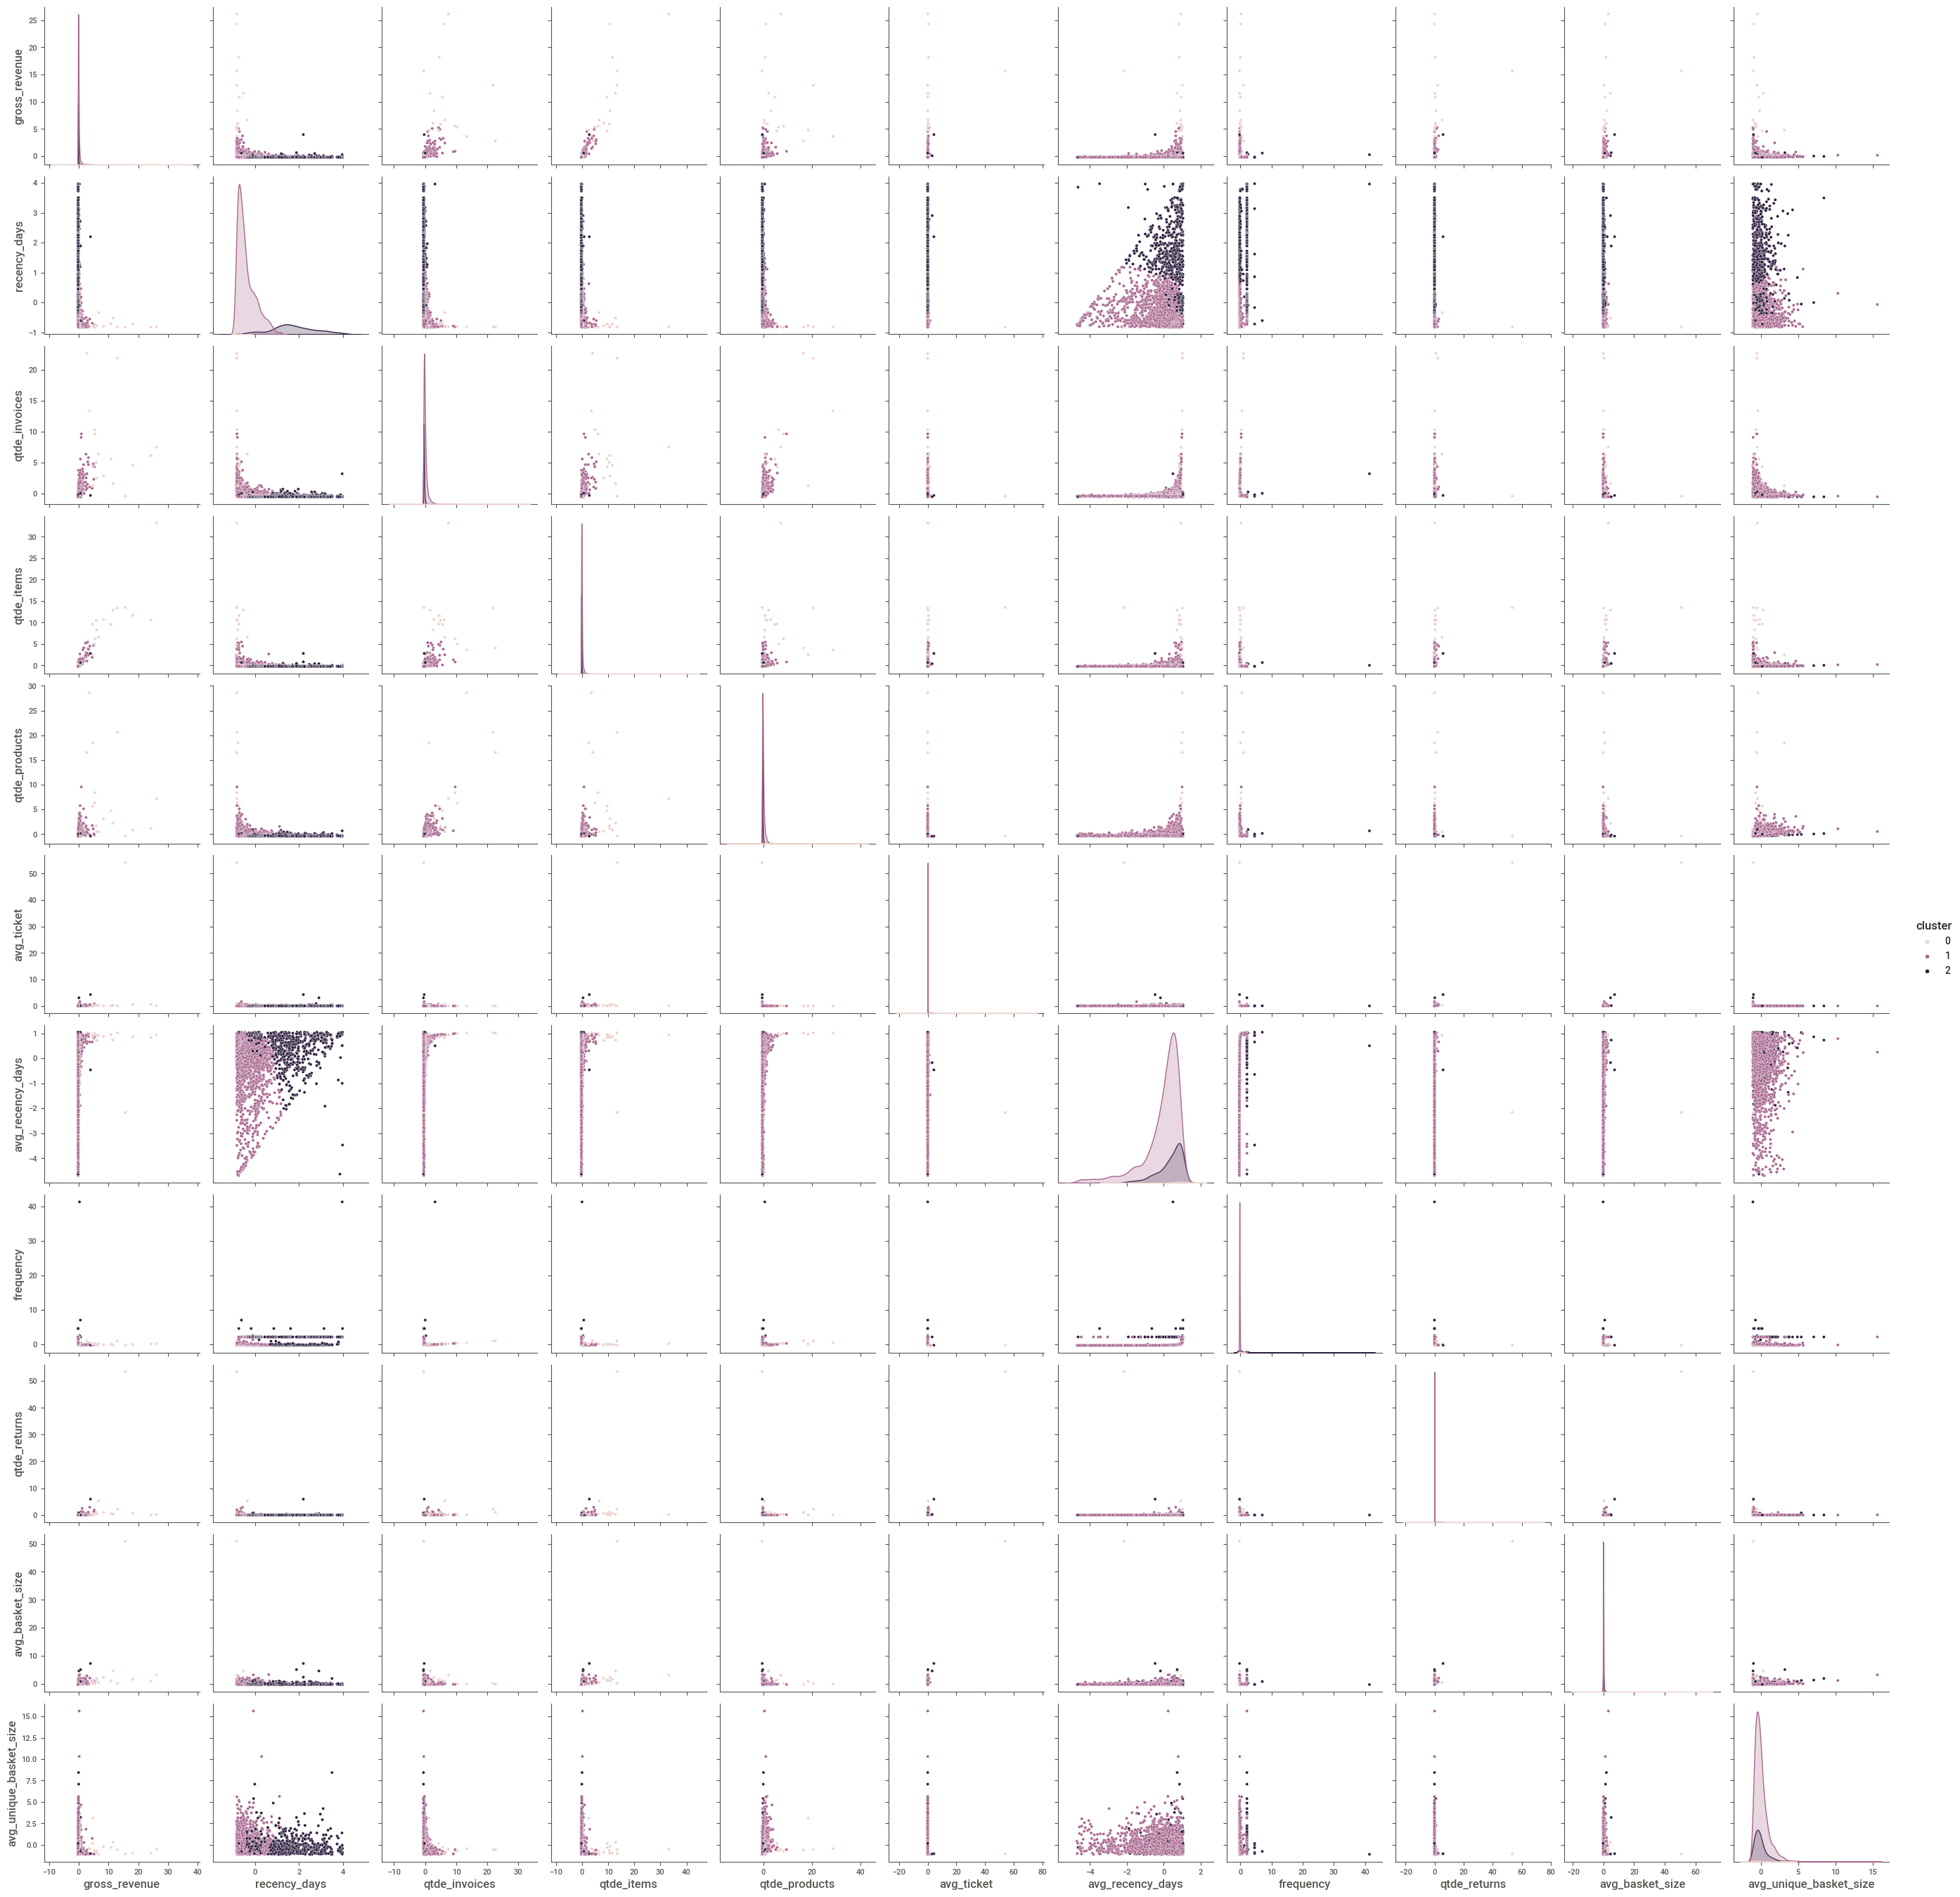

In [217]:
# Criando um DataFrame para visualização sem a coluna 'customer_id'
df_viz = df9.drop(columns='customer_id', axis=1)

# Criando um pairplot com cores definidas pelo cluster
sns.pairplot(df_viz, hue='cluster')

## 9.3. UMAP

<Axes: xlabel='embedding_x', ylabel='embedding_y'>

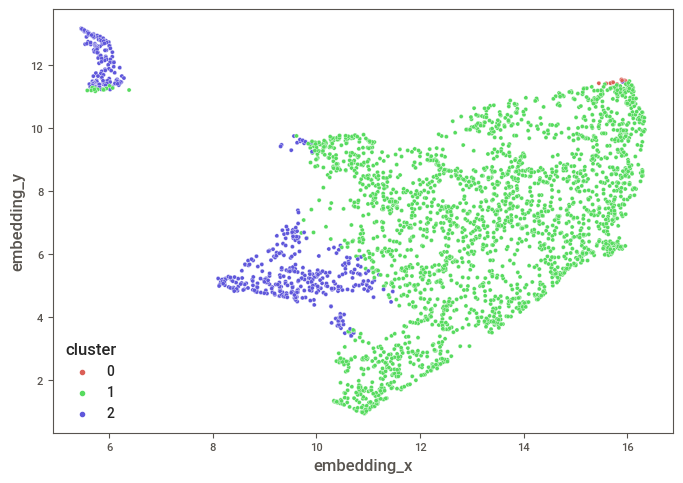

In [218]:
# Redução de dimensionalidade UMAP
reducer = umap.UMAP(n_neighbors=90, random_state=42)
embedding = reducer.fit_transform(X)

# Adicionando as coordenadas de embedding ao DataFrame
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]

# Plotagem dos dados de embedding com cores definidas pelo cluster
sns.scatterplot(x='embedding_x', y='embedding_y',
                hue='cluster',
                palette=sns.color_palette('hls', n_colors=len(df_viz['cluster'].unique())),
                data=df_viz)



## 9.4. Cluster Profile

In [219]:
df9.head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size,cluster
0,17850,0.249733,3.958037,3.193307,0.021090,0.645823,-0.032549,0.501281,41.378877,-0.014652,-0.251248,-1.091168,2
1,13047,0.045683,-0.106602,0.370056,-0.037178,0.178898,-0.031824,0.631132,-0.209503,-0.017958,-0.120504,-0.376377,1
2,12583,0.373960,-0.801192,1.047636,0.580837,0.404949,-0.022180,0.695074,-0.180046,-0.008039,0.107890,-0.639461,1
3,13748,-0.170252,0.395046,-0.081664,-0.198732,-0.351024,-0.017392,-0.398496,-0.234940,-0.041103,-0.204712,-0.820600,1
4,15100,-0.177082,3.456388,-0.307524,-0.259718,-0.443668,0.231589,0.924675,-0.099554,-0.026555,-0.281957,-1.109561,2


In [220]:
# Número de clientes em cada cluster
df_cluster = df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100 * (df_cluster['customer_id'] / df_cluster['customer_id'].sum())

# Média da receita bruta em cada cluster
df_avg_gross_revenue = df9[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gross_revenue, how='inner', on='cluster')

# Média dos dias de recência em cada cluster
df_avg_recency_days = df9[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency_days, how='inner', on='cluster')

# Média do número de faturas em cada cluster
df_invoice_no = df9[['invoice_no', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_invoice_no, how='inner', on='cluster')

# Média do valor do tíquete em cada cluster
df_ticket = df9[['avg_ticket', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_ticket, how='inner', on='cluster')

# Exibindo o DataFrame resultante
df_cluster


KeyError: "['invoice_no'] not in index"

### Cluster 0 
- Número de clientes: 1,086 (25.08% dos clientes)
- Recência média: -0.16 dias
- Número médio de compras: 1.54 compras
- Receita média: -$0.35

### Cluster 1
- Número de clientes: 3,222 (74.41% dos clientes)
- Recência média: -0.02 dias
- Número médio de compras: -0.51 compras
- Receita média: $0.06

### Cluster 2
- Número de clientes: 22 (0.51% dos clientes)
- Recência média: 10.34 dias
- Número médio de compras: -0.72 compras
- Receita média: $8.44


# 10.0. Deploy To Production